Date: October 11, 2025

Name: Mufaro Machaya

# Experiment 5: Extended Analysis of Experiments 2 and 3

In [1]:
from common import *

**Purpose:** This notebook is for further analysis of the data gathered in experiments 2 and 3, particularly the time constant $\tau$ in experiment 2 and the LRC resonant frequency in experiment 3, with the intention of analyzing how some new fitting models apply to the data.

**Lab Goals:**
> 1. learn about systematic errors in electronic instruments
> 2. have practice fitting straight lines to data
> 3. have practice linearizing data that follows a power law
> 4. have practice comparing the quality of fits to different models

## Analysis of RC Time Constant Data (Experiment 2)

**Loading the Experiment 2 Data:** The circuit had a $488.8$ $nF$ capacitor, and had variable resistance at $0.991, 1.983, 2.973, 3.967$ $k\Omega$. The specifications sheet for the multimeter placed the uncertainty in each resistance measurement $R$ as $$u[R] = R \times 0.05\% + 3 \times 0.001$$
and the uncertainty in the capacitance measurement, by the same specification sheet, is
$$u[C] = C \times 2\% + 5 \times 0.1 \text{ nF}$$

Capacitance: $C = 488.8 \pm 10.2$ $nF$

In [2]:
capacitance = 488.8e-9
capacitance_uncert = capacitance * 0.02 + 5 * 0.1e-9

There were resistance values of $R = 991 \pm 3$ $\Omega$, $1,983 \pm 3$ $\Omega$, $2,973 \pm 4$ $\Omega$, and $3,967 \pm 5$ $\Omega$.

In [3]:
resistance_values = np.array([991, 1983, 2973, 3967])
resistance_uncert = np.array([  3,    3,    4,    5])

From each resistance value, an expected/theoretical time constant can be produced using $\tau = RC$, and the uncertainty in this value is
$$u[\tau] = \tau \sqrt{ \left(\frac{u[R]}{R}\right)^2 + \left(\frac{u[C]}{C}\right)^2 }.$$

In [4]:
theoretical_time_constants       = resistance_values * capacitance
theoretical_time_constant_uncert = theoretical_time_constants * \
    np.sqrt( (resistance_uncert  / resistance_values) ** 2 + \
             (capacitance_uncert / capacitance) ** 2 )

Each dataset then has a set of fitted time constants and their corresponding uncertainties:

In [5]:
actual_time_constants = np.array([5.09597470e-04,
                                  9.95704278e-04, 
                                  1.47831252e-03, 
                                  1.96182709e-03])
actual_time_constant_uncert = np.array([6.59578402e-08,
                                       1.88040400e-07,
                                       2.32134499e-07,
                                       2.44434542e-07])

In all, all of the values are

| $R$ $(\Omega)$ | $\tau_T$ $(\mu s)$          | $\tau_A$ $(\mu s)$    |
|----------------|---------------------------|---------------------|
| $991 \pm 3$    | $484 \pm 10$              | $509.60 \pm 0.06$   |
| $1983 \pm 3$   | $969 \pm 20$              | $995.7  \pm 0.2$    |
| $2973 \pm 4$   | $1453 \pm 30$             | $1478.3 \pm 0.2$    |
| $3967 \pm 5$   | $1939 \pm 40$             | $1961.8 \pm 0.2$    |

In [6]:
rc_data = Dataset(
    x  = resistance_values, 
    dx = resistance_uncert, 
    y  = actual_time_constants, 
    dy = actual_time_constant_uncert
)

### 1-Parameter Linear Fit (Slope-Only Plot)

In [7]:
gopts=GraphingOptions(
    x_label='Resistance',
    y_label='Time Constant',
    x_units='$\Omega$',
    y_units='$s$'
)

In [8]:
rc_model_1param = LinearFitParametersOne(slope=capacitance)
results_rc1 = autofit_dataset(rc_data, gopts, rc_model_1param)
results_rc1.tabulate()

+---------------+----------+---------------+
| Measurement   |    Value |   Uncertainty |
+===============+==========+===============+
| s             | 5.02e-07 |     3.617e-11 |
+---------------+----------+---------------+
Chi^2 = 17372.940


**Observation:** The first parameter fit resulted in extremely high error, at $\chi^2=17,372.940$. So, we can conclude that this is probably a bad method for fitting--but why?

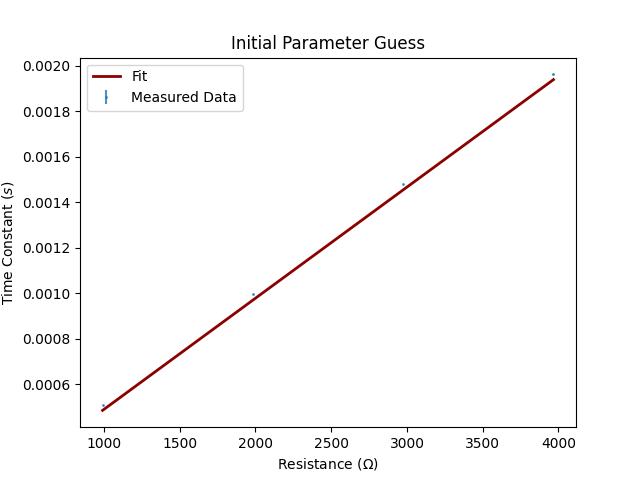

In [9]:
display(results_rc1.initial_guess_graph)

**Observation:** Direct visual observation shows that the initial guess mostly matches the data, so our capacitance likely is the actual slope of the data regardless.

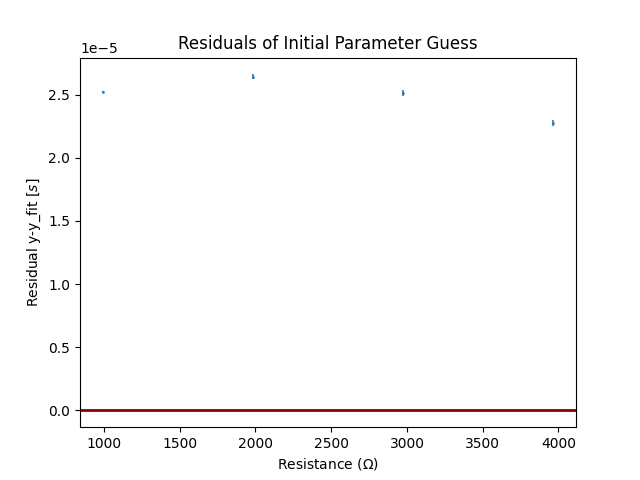

In [10]:
display(results_rc1.initial_guess_residuals_graph)

**Observation:** The residuals graph for the initial guess shows that the actual points are largely close to each other, and each is off from the estimation by a roughly equal gap, so I can conclude that the model is probably off due to not having an offset.

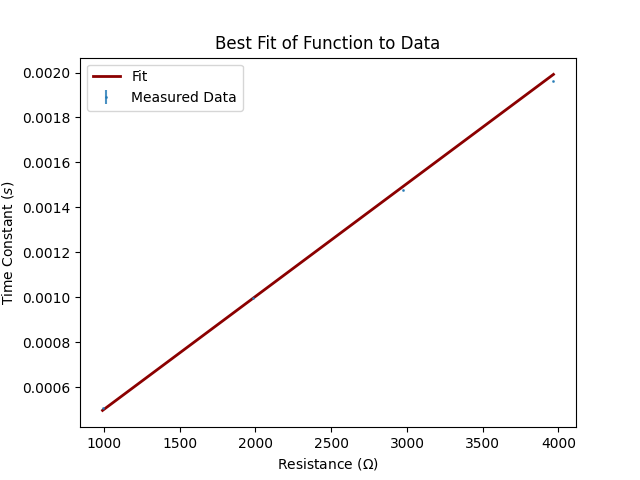

In [11]:
display(results_rc1.autofit_graph)

**Observation:** This graph also seems to match from visual inspection, but the difference is that it minimized the residuals by bisecting the points (and even directly hitting one of them).

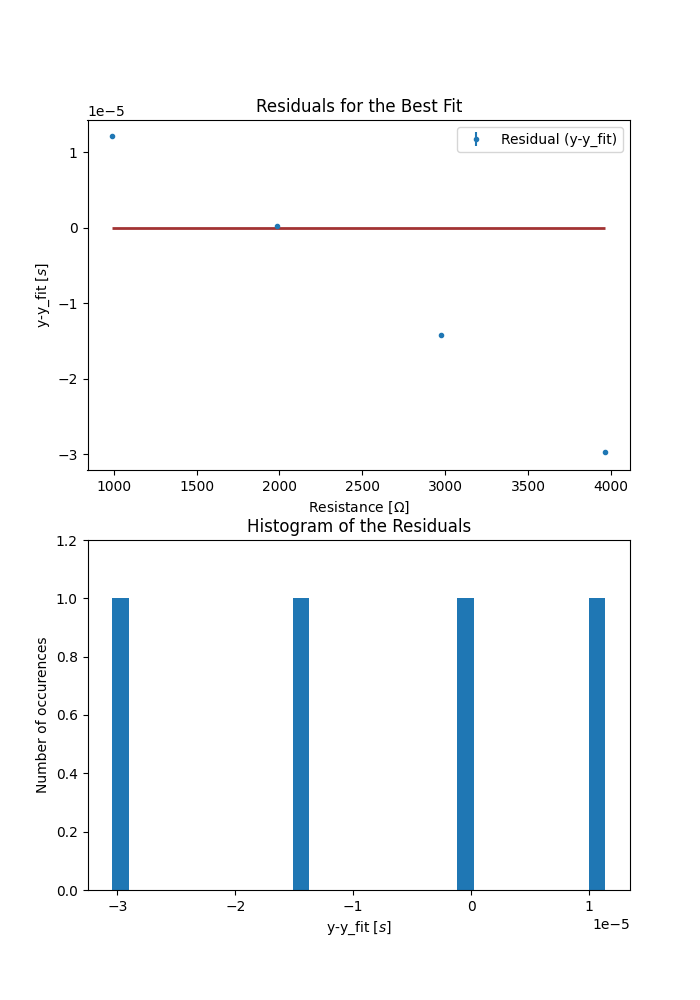

In [12]:
display(results_rc1.autofit_residuals_graph)

**Observation:** This residuals graph shows that the data is bisected by the estimation line, which is a better fit, but it may not necessarily be the correct fit as the bisection point (when the trendline of the data with an offset would cross the trendline of the data without the offset) is likely only this early on into the data due to the limited amount of data available. 

### 2-Parameter Linear Fit

In [13]:
rc_model_2param = LinearFitParameters(slope=capacitance,intercept=0)
results_rc2 = autofit_dataset(rc_data, gopts, rc_model_2param)
results_rc2.tabulate()

+---------------+-----------+---------------+
| Measurement   |     Value |   Uncertainty |
+===============+===========+===============+
| slope         | 4.884e-07 |     6.998e-11 |
+---------------+-----------+---------------+
| intercept     | 2.576e-05 |     1.13e-07  |
+---------------+-----------+---------------+
Chi^2 = 51.993


**Observation:** Switching to a two-parameter model immediately decreased the residuals, obtaining $\chi^2=52$, which is still quite bad, indicating that the model doesn't effectively match the data, but it's a much better fit as compared to the 1-parameter model. It obtained a slope basically identical to the capacitance with an intercept of $25.76 \pm 0.11$ $\mu s$.

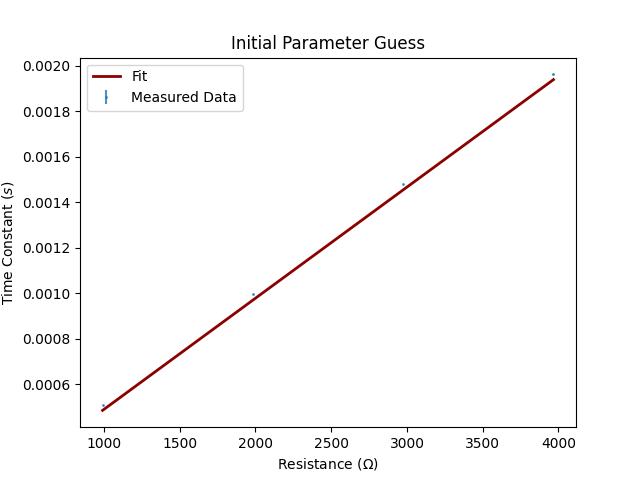

In [14]:
display(results_rc2.initial_guess_graph)

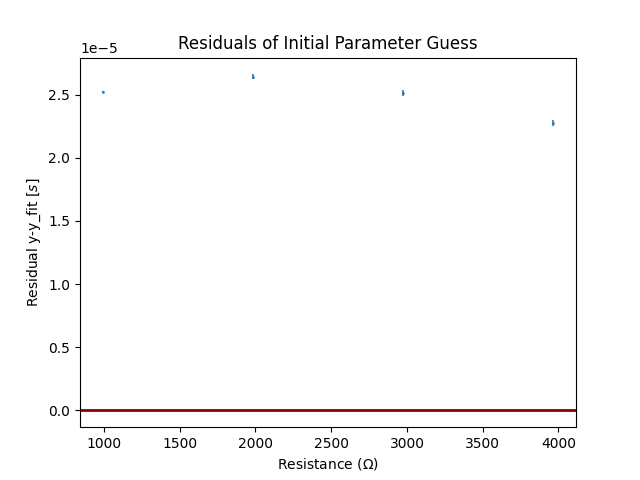

In [15]:
display(results_rc2.initial_guess_residuals_graph)

**Observation:** The initial parameter guess is exactly the same as that of the previous round, so no information can be obtained there. 

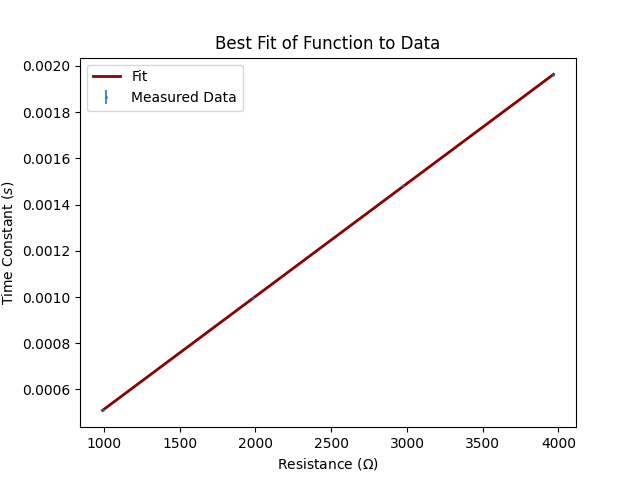

In [16]:
display(results_rc2.autofit_graph)

**Observation:** Visual inspection of the autofit graph shows promise, the the data seems to almost completely be fit.

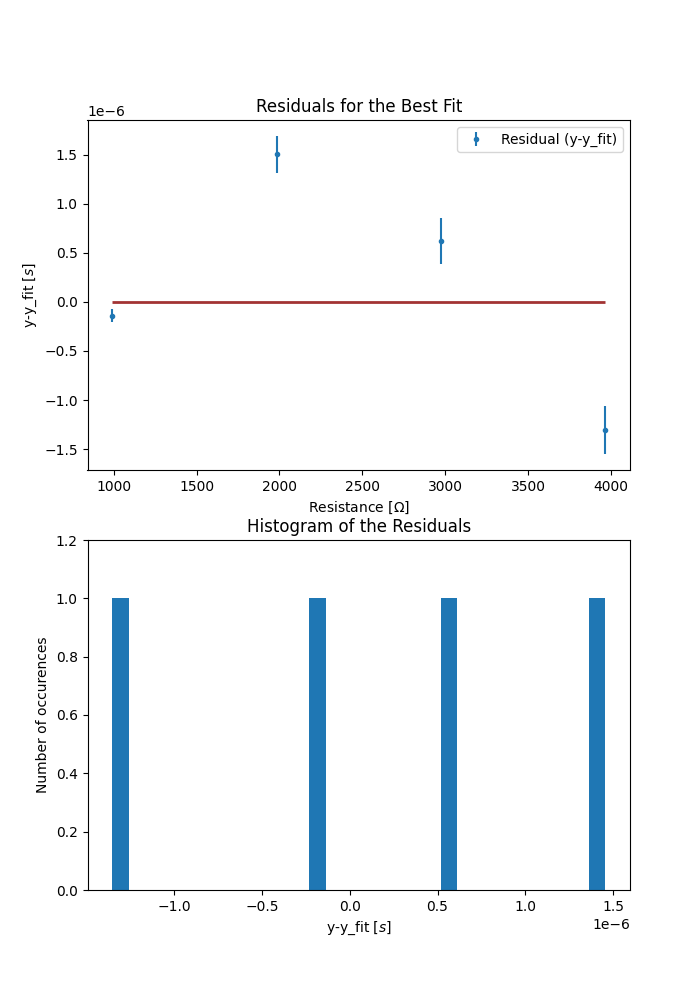

In [17]:
display(results_rc2.autofit_residuals_graph)

**Observation:** This model is quite a bit better. The data is bisected again, but the gap between the the datapoints and the autofit line is small enough that the residuals get close to the autofit line, but the high $\chi^2$ of this graph can be best explained by the uncertainties of the points likely being underestimated, as no line would be able to simultaneously reach all of them.
- We can interpret the slope as being the same in the 1-parameter case as just the capacitance, but the intercept isn't nearly as clear. The best guess I can give is based on the inherent resistance of the circuit. The theoretical time constant neglects the inherent resistance present in the wires of the circuit, so we may be able to calculate the underlying resistance (due to, say, the wires/components) using this intercept and the capacitance.

### Conclusion

We can conclude that the two-parameter model is likely the best based on both the actual fits and physical interpretation. The one-parameter fit obtained $\chi^2=17373$ whereas the two-parameter fit obtained $\chi^2=52$. Furthermore, the residuals graph of the two-parameter model clearly matches the data better with less of a trend in the graph, and most importantly, we can provide a physical interpretation in the underlying resistance of the circuit.

## Analysis of LRC Resonant Frequency Data (Experiment 3)

**Loading the Experiment 3 Data:** This experiment has variable capacitance values at a standard inductance and resistance, obtaining a final resonant frequency (and time constant) from each value of capacitance.

Using square uncertainty $1/(2\sqrt{3})$ for the uncertainty, the inductance of the circuit was
$$L = 457 \pm 0.3 \text{ } \mu H$$

In [18]:
inductance = 457e-6
inductance_uncert = 1/(2 * np.sqrt(3)) * 1e-6

The resistance of the circuit (with uncertainty by the specification sheet equation) was
$$R = 992 \pm 3 \text{ } \Omega$$

In [19]:
resistance = 0.992e3
resistance_uncert = resistance * 0.005/100 + 3 * 0.001 * 1e3

The capacitance and resonant frequency values, then, were

| Capacitance ($10^{-16}$ F) | Resonant Frequency (Hz) |
|----------------------------|-------------------------|
| $224 \pm 2$                | $511600 \pm 15$         |
| $174 \pm 2$                | $573500 \pm 18$         |
| $151 \pm 2$                | $606900 \pm 18$         |
| $126 \pm 2$                | $649300 \pm 18$         |
| $92 \pm 2$                 | $722000 \pm 16$         |
| $43 \pm 2$                 | $862800 \pm 15$         |

In [20]:
capacitance        = np.array([224, 174, 151, 126, 92, 43]) * 1e-16
capacitance_uncert = np.full_like(capacitance, 2) * 1e-16

In [21]:
res_freq        = np.array([511600, 573500, 606900, 649300, 722000, 862800])
res_freq_uncert = np.array([    15,     18,     18,     18,     16,     15])

The theoretical resonant frequency for a given capacitance and inductance is
$$\omega_0 = \frac{1}{\sqrt{LC}}$$
with
$$u[\omega_0] = \frac{\omega_0}{2} \sqrt{\left(\frac{u[L]}{L}\right)^2 + \left(\frac{u[C]}{C}\right)^2}$$

In [22]:
res_freq_expect = 1/np.sqrt(inductance * capacitance)
res_freq_expect_uncert = res_freq_expect / 2 * \
    np.sqrt((inductance_uncert  / inductance)  ** 2 + \
            (capacitance_uncert / capacitance) ** 2)

### Plotting Setup

I'll be using $1/C$ as the y value and the resonant frequency squared as the x-value. With this,
$$u[\omega_0^2] = 2 \omega_0^2 u[\omega_0]$$
and
$$u[1/C] = \frac{u[C]}{C^2}$$

In [23]:
lrc_data = Dataset(
    x  = res_freq ** 2, 
    dx = 2 * res_freq ** 2 * res_freq_uncert,
    y  = 1 / capacitance, 
    dy = capacitance_uncert / capacitance ** 2, 
)

In [24]:
gopts = GraphingOptions(
    x_label = 'Resonant Frequency Squared',
    y_label = '1 / Capacitance',
    x_units = '$Hz^2$',
    y_units = '$F^{-1}$'
)

### 1-Parameter Model

Knowing that the theoretical model is $$\omega_0 = \frac{1}{\sqrt{LC}},$$ the actual model should be $$\omega_0^2 L = 1/C,$$ making the theoretical slope the inductance. 

In [25]:
lrc_model_1param = LinearFitParametersOne(slope=inductance)
results_lrc1 = autofit_dataset(lrc_data, gopts, lrc_model_1param)
results_lrc1.tabulate()

+---------------+---------+---------------+
| Measurement   |   Value |   Uncertainty |
+===============+=========+===============+
| s             |   177.6 |        0.9898 |
+---------------+---------+---------------+
Chi^2 = 33.902


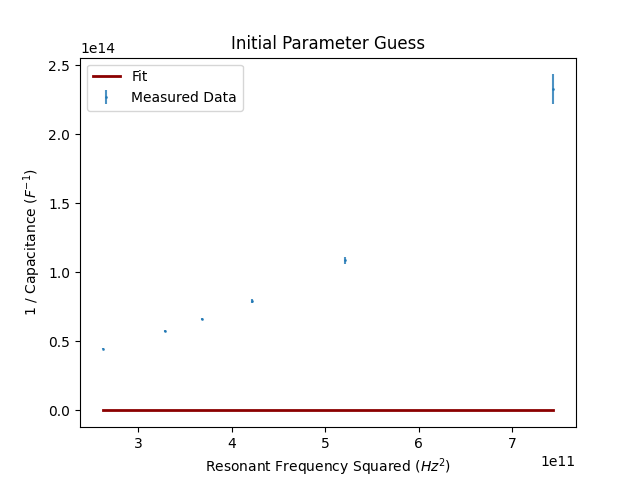

In [26]:
display(results_lrc1.initial_guess_graph)

**Observation:** The initial guess graph completely doesn't seem to match, which is definitely curious. Let's see what the autofit graph obtains.

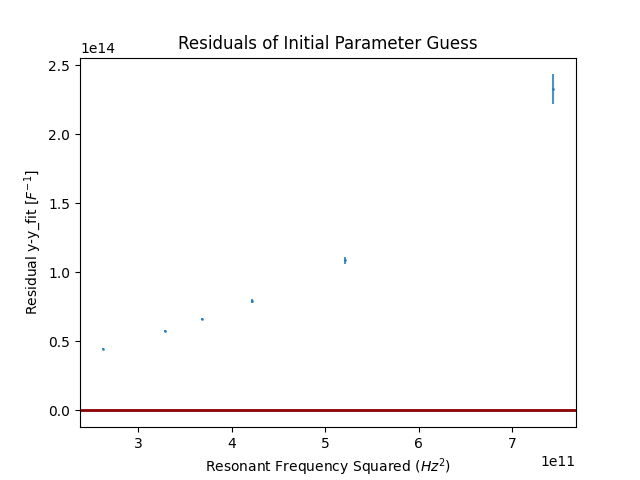

In [27]:
display(results_lrc1.initial_guess_residuals_graph)

**Observation:** The residuals graph of the initial guess shows that the slope is underestimated, as a trend can still be seen in the data and all of the points are underestimated. This fit might benefit from an offset upward AND an increased slope.

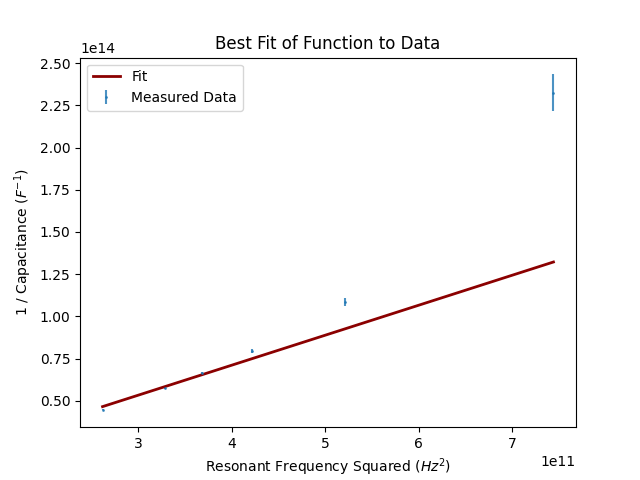

In [28]:
display(results_lrc1.autofit_graph)

**Observation:** The autofit graph seems to match from visual inspection.

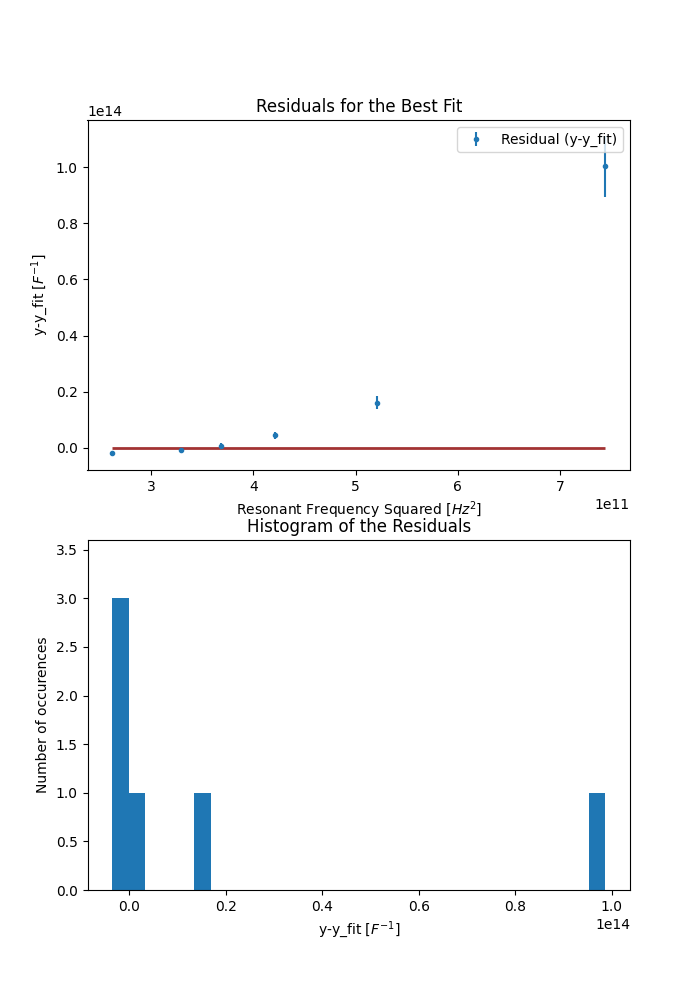

In [29]:
display(results_lrc1.autofit_residuals_graph)

**Observation:** For the same reasons as the previous round's 1-parameter fit, however, this plot seems to bisect the data, which seems good on first inspection but due to the continued trend, this graph is probably not a good fit. An offset is probably necessary.

### 2-Parameter Model

We know mathematically that the intercept should be 
$$L \times \tau^2 = \frac{R^2}{4L},$$
based on the less-approximated model
$$\omega_0 = \sqrt{\frac{1}{LC} - \frac{R^2}{4L^2}}$$
which becomes
$$L\omega_0^2 + L\tau^2 = 1/C$$

In [30]:
lrc_model_2param = LinearFitParameters(slope=inductance,
                                       intercept=resistance ** 2 / (4 * inductance))
results_lrc2 = autofit_dataset(lrc_data, gopts, lrc_model_2param)
results_lrc2.tabulate()

+---------------+-------------+---------------+
| Measurement   |       Value |   Uncertainty |
+===============+=============+===============+
| slope         | 227.4       |     5.208     |
+---------------+-------------+---------------+
| intercept     |  -1.568e+13 |     1.609e+12 |
+---------------+-------------+---------------+
Chi^2 = 18.629


**Observation:** This time, to attempt to resolve the unit discrepancy seen before, I'm using an initial guess of the slope as a tenth of the inductance.

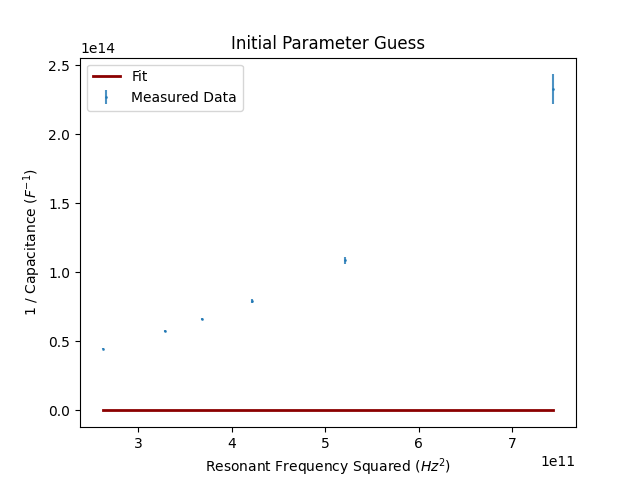

In [31]:
display(results_lrc2.initial_guess_graph)

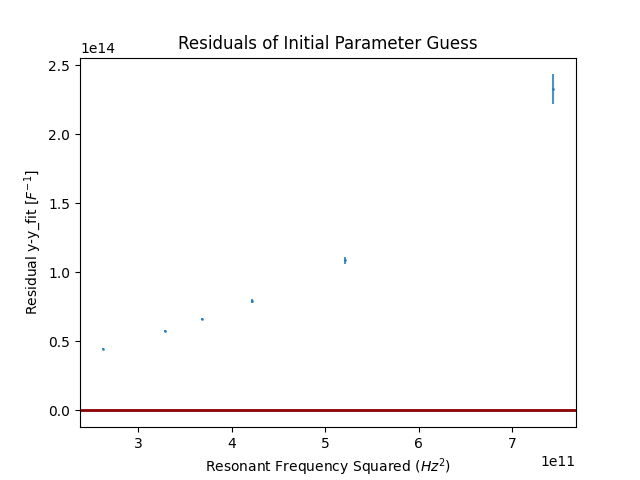

In [32]:
display(results_lrc2.initial_guess_residuals_graph)

**Note:** The initial guess was the exact same as in the 1-parameter case.

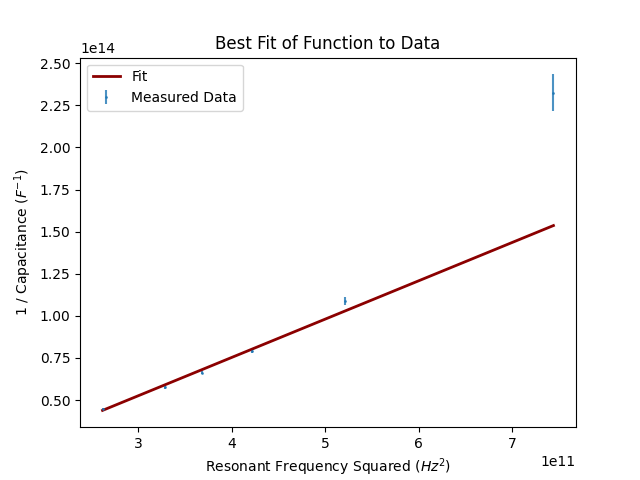

In [33]:
display(results_lrc2.autofit_graph)

**Observation:** From visual observation, even with an offset, the trendline doesn't seem to fit the data. This data actually seems to have something of a quadratic fit, which hints that my present theoretical model of

$$w_0 = 1/\sqrt{LC}$$

may not be telling the full story.

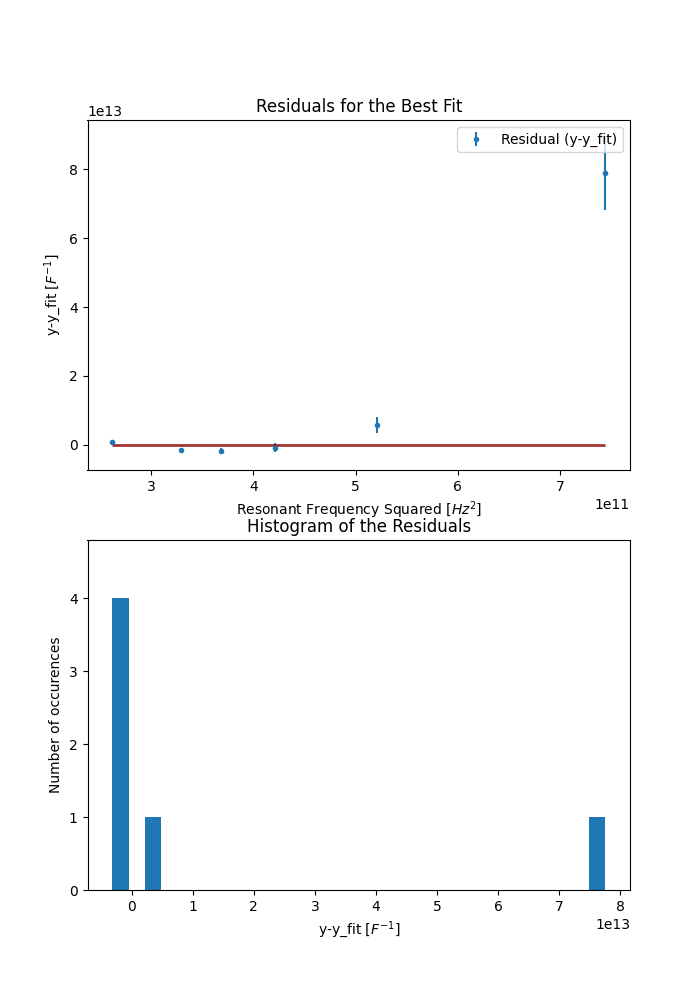

In [34]:
display(results_lrc2.autofit_residuals_graph)

**Observation:** And my previous point is further confirmed by the residuals. Despite my linear assumption, this data is clearly quadratic. A much better way to have tested this, therefore, would have been to try and rewrite the model equation as

$$1/\sqrt{C} = w_0 \sqrt{L},$$

which would make the slope $\sqrt{L}$ instead of $L$, allowing the resonant frequency $w_0$ to remain un-squared and then we could compare the results with this graph for any discrepancies.

### Conclusion

The one-parameter model is a mathematically-weaker fit at $\chi^2 = 33.9$ against the two-parameter model's $\chi^2=18$, and the one-parameter model has the same issue of bisecting the data (so likely only being a good fit due to the lack of data). Therefore, the two-parameter model is undoubtedly better. However, as the second model clearly has a pattern to the residuals as well, the fundamental observation is that not enough data is present to decide which model actually matches reality between these two models at least, and from the residuals seen, we can assume that a better model would likely need to be quadratic.

**Questions**

> Does a simple one-parameter linearized fit function work?

Somewhat. Yes-and-no. It seems to be a "better" fit purely mathematically, but the likely interpretation is that it is actually overfitting/incorrectly fitting the dataset due to the lack of data.

> Does the one-parameter in the fit match the expectation for your measured inductance?

Oddly enough, no. Not at all.

> Do you see any sign in the residuals that would suggest you are seeing the correction due to
damping?

Yes, and this is evident in the fact that the graph requires an intercept at all, as the points were seemingly a standard gap away from the estimation model.

> Does the use of an intercept improve the fit significantly? In either case can your reconcile your
conclusion from the data with what you expect from the circuit you have measured (consider
using component values as well as your time-domain and frequency-domain measurements
to think about this)?

The intercept undoubtedly made the fit mathematically better, but it didn't seem able to perfectly match the data, as the residuals resulted in a quadratic fit.

# Overall Conclusion

### Comparing the Characteristic Parameters

**RC Time Constant** $\tau$

In [35]:
rc_tau_gopts = GraphingOptions(
    x_label = 'Resistance',
    y_label = 'Time Constant',
    x_units = '$\Omega$',
    y_units = 's'
)

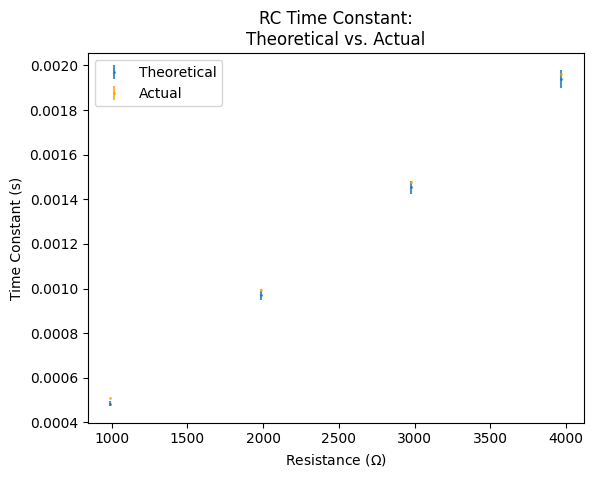

In [36]:
plt.figure()
rc_tau_gopts.plot_data(
    resistance_values, 
    theoretical_time_constants, 
    theoretical_time_constant_uncert, 
    label='Theoretical'
)
rc_tau_gopts.plot_data(
    resistance_values,
    actual_time_constants, 
    actual_time_constant_uncert,
    label='Actual',
    color='orange'
)
rc_tau_gopts.set_labels()
plt.title('RC Time Constant:\nTheoretical vs. Actual')
plt.legend()
plt.show()

**Observation:** The theoretical and actual time constnats are incredibly similar, wich the actual time constant falling within the range of uncertainty of the theoretical time constant for most points (based on visual observation), so we can safely say that the measurement matches expectation.

**LRC Resonant Frequency** $\omega_0$

In [37]:
lrc_tau_gopts1 = GraphingOptions(
    x_label = 'Capacitance',
    y_label = 'Resonant Frequency',
    x_units = 'F',
    y_units = 'Hz'
)

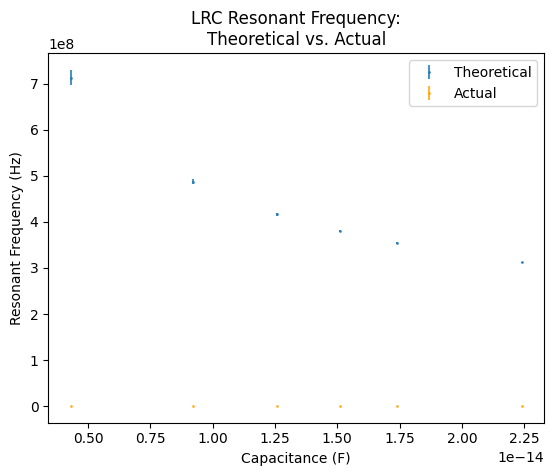

In [38]:
plt.figure()
lrc_tau_gopts1.plot_data(
    capacitance, 
    res_freq_expect, 
    res_freq_expect_uncert, 
    label='Theoretical'
)
lrc_tau_gopts1.plot_data(
    capacitance,
    res_freq, 
    res_freq_uncert,
    label='Actual',
    color='orange'
)
lrc_tau_gopts1.set_labels()
plt.title('LRC Resonant Frequency:\nTheoretical vs. Actual')
plt.legend()
plt.show()

**Observation:** We can immediately explain the issues in our previous modelling based on seeing how our theoretical values completely differ from the actual. The theoretical values are clearly an entire order of magnitude larger than the actual expected values, and the actual values don't have nearly as much of a decreasing trend as compared to the theoretical values.